Often, the data that we wind up plotting isn't the in a very readable format-- whether it's a matter of rounding numbers to a managable significance level or substituting "January ... December" for the numbers 1-12.

Starting with a simple figure.

Populating the interactive namespace from numpy and matplotlib


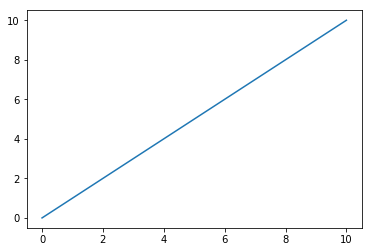

In [1]:
%pylab inline

x = y = np.linspace(0, 10)

fig, ax = plt.subplots()
ax.plot(x, y)

## Reformatting Floats

Often our axis won't have numbers in a very clean/readable format.

### Huge Numbers

Something like this will make a reader squint and count 0's

In [2]:
bigY = y * 10000

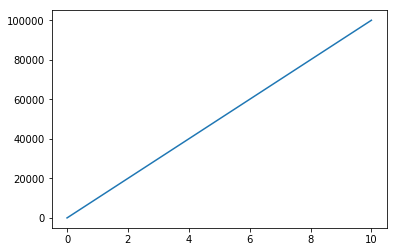

In [3]:
fig, ax = plt.subplots()
ax.plot(x, bigY)

We can save them the headache with `StrMethodFormatter`.

Note: [per the documentation](https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.StrMethodFormatter), the formatting in the curly braces *must* begin with `x`.

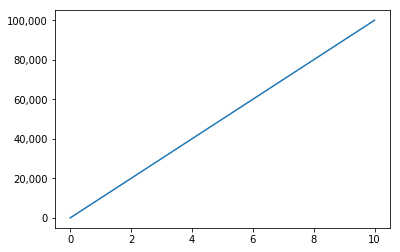

In [4]:
fig, ax = plt.subplots()
ax.plot(x, bigY)

fmtr = matplotlib.ticker.StrMethodFormatter(('{x:,g}'))
ax.yaxis.set_major_formatter(fmtr)

Or if you find yourself reporting on millionaires, cleaning up the y axis with a custom function does you a lot of favors.

Note: Still unclear why, but your custom function should be prepared to take a second argument, regardless of whether or not you use it.

In [5]:
biggerY = y * 10e8

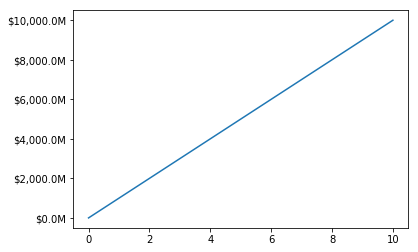

In [6]:
def millions(x, pos):
    return '${:,.1f}M'.format(x*1e-6)

fmtr = matplotlib.ticker.FuncFormatter(millions)

fig, ax = plt.subplots()
ax.plot(x, biggerY)

_ = ax.yaxis.set_major_formatter(fmtr)

### Percents

We can figure out the correct syntax to format a float into a percent via some string formatting finagling via `StrMethodFormatter`

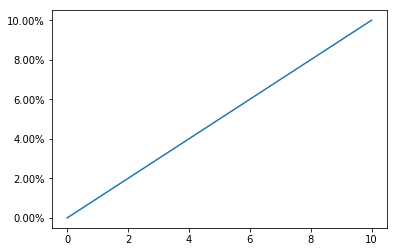

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y)

fmtr = matplotlib.ticker.StrMethodFormatter('{x:2.2f}%')
_ = ax.yaxis.set_major_formatter(fmtr)

Alternatively, we can use `PercentFormatter` to make short work of the same task, and neater, too.

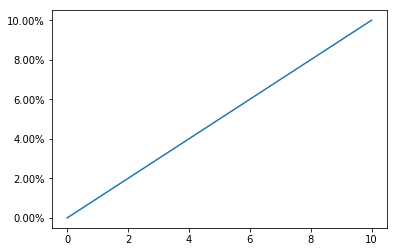

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y)

fmtr = matplotlib.ticker.PercentFormatter(decimals=2)
_ = ax.yaxis.set_major_formatter(fmtr)

## Changing Tick Outright

Now imagine that we're trying to make our X axis (1-10) correspond to which letter of the alphabet it enumerates.

Simply setting the tick labels doesn't suffice, because each tick represents multiples of 2.

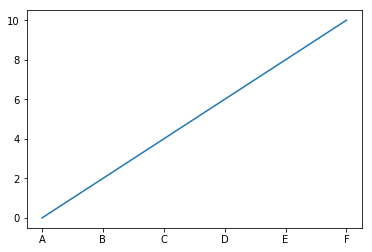

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y)
_ = ax.xaxis.set_ticklabels(['', 'A', 'B', 'C', 'D', 'E', 'F'])

Similarly, if we line up the labels to their appropriate location, we're throwing out every other letter because we're only *showing every other tick*.

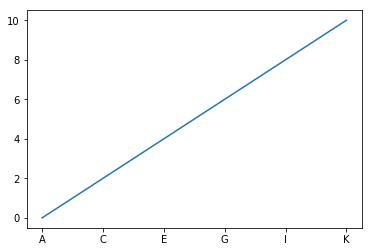

In [10]:
fig, ax = plt.subplots()
ax.plot(x, y)
fmtr = matplotlib.ticker.IndexFormatter(list('ABCDEFGHIJK'))
ax.xaxis.set_major_formatter(fmtr)

Thus, the solution (borrowing from [the other notebook on Tick Locations]({{< relref \"tick_locating\">}})) involves the same step as before, while also turning on the odd ticks in between.

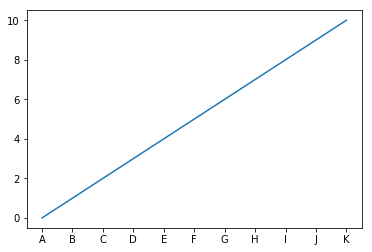

In [11]:
fig, ax = plt.subplots()
ax.plot(x, y)
fmtr = matplotlib.ticker.IndexFormatter(list('ABCDEFGHIJK'))
ax.xaxis.set_major_formatter(fmtr)

loc = matplotlib.ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(loc)